# Palmer Penguins
***
This notebook contains my analysis of the famous palmer penguins dataset.

![Palmer](https://upload.wikimedia.org/wikipedia/commons/thumb/2/24/Antarctica_relief_location_map.jpg/240px-Antarctica_relief_location_map.jpg)

The data set is avaialble [on Github](https://allisonhorst.github.io/palmerpenguins/).

The Palmer Penguin data set was collected by Dr. Kristen Gorman at Palmer Station in Antarctica. 
The data set was originally created with the intention of studying penguin foraging behaviour and environmental variability relationships.
This data set is now commonly used to study data analytics and machine learning.
The data set looks at the following variables:
|Variable      |Type/Unit                 |
|--------------|:------------------------ |
|Species       |Adelie/ Chinstrap/ Gentoo |
|Island        |Torgersen/ Biscoe/ Dream  |
|Bill length   | mm                       |
|Bill depth    | mm                       |   
|Flipper length| mm                       |
|Body mass     | g                        |
|Sex           | male/female/NaN          |

The three species of penguins are pictured below:
<div style="display: flex; justify-content: space-between;">
    <div style="text-align: center;">
        <strong>Adelie</strong>
        <br>
        <img src="https://upload.wikimedia.org/wikipedia/commons/8/82/Manchot_Ad%C3%A9lie_-_Adelie_Penguin.jpg" style="max-width: 100%; height: 200px;">
    </div>
    <div style="text-align: center;">
        <strong>Chinstrap</strong>
        <br>
        <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/cd/Chinstrap_Penguin.jpg/160px-Chinstrap_Penguin.jpg" style="max-width: 100%; height: 200px;">
    </div>
    <div style="text-align: center;">
        <strong>Gentoo</strong>
        <br>
        <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/00/Brown_Bluff-2016-Tabarin_Peninsula%E2%80%93Gentoo_penguin_%28Pygoscelis_papua%29_03.jpg/800px-Brown_Bluff-2016-Tabarin_Peninsula%E2%80%93Gentoo_penguin_%28Pygoscelis_papua%29_03.jpg"style="max-width: 100%; height: 200px;">
    </div>
</div>

The penguins had their species identified, were sexed, measured and the island on which they were found was recorded.
The entire data set is comprised of 344 penguins:
|Species | Amount|
|--------|:------:|
|Adelie  |152|
|Chinstrap|124|
|Gentoo  |68|

This notebook will give an overview of the data set, suggest vairiables for modelling and create approrprate bar and histogram charts. It will then provide further analysis of 2 appropriate variables to draw correlations and reasonable conclusions.

Note: Soruces are provided accordingly in some instances these were used in conjuction with AI to gain a simpler understanding of how to implement.
Sources:
Introduction to the data set https://cran.r-project.org/web/packages/palmerpenguins/readme/README.html
HTML Image formatting and insertion : https://www.w3schools.com/html/html_images.asp

## Imports
***
we use pandas for the dataframe data structure

it allows us to investigate CSV files amongst other features

In [1]:
# Data frames.
import pandas as pd

We use matplotlib for creating bar charts and histograms 

In [2]:
# Import Matplotlib
import matplotlib.pyplot as plt

We will use Seaborne for other types of data visualitaions NOTE ANDRE ELABORATE ON THIS 


In [3]:
import seaborn as sns

## Load Data
Load the palmer penguins data set from a URL.

In [4]:
# Load the penguins data set.
df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")

The data is now loaded and we can inspect it.

In [5]:
# Lets have a look.
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


## Inspect Data
***

In [6]:
#Look at the first row.
df.iloc[0]

species                 Adelie
island               Torgersen
bill_length_mm            39.1
bill_depth_mm             18.7
flipper_length_mm        181.0
body_mass_g             3750.0
sex                       MALE
Name: 0, dtype: object

In [7]:
# Let's undertand the types of data we have in this data set.
df.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

We can see above that the data is either in the format as floating point numbers or objects. Objects are non-heterogenous data and are common for strings. Floating point numbers should be treated with caution especially if further calculations or manipulations of the data are performed. This is because binary systems are commonly not accurate due to the 64 bit limits and therefore can lead to rounding.

Interestingly one of the variables that we do not always have a clear value for is sex. This is most likely to the surveyour not being able to sex the penguin at the time. This analysis would like to take the penguin measurements to:
1. Determine trends of penguin measurements between species.
2. Determine differences if penguin measurement between sexes.
3. Use these findings to give an estimated guess as to the missing sexes of the penguins.

Source: https://www.geeksforgeeks.org/floating-point-error-in-python/ 

In [8]:
# Sex of penguins 
df['sex']

0        MALE
1      FEMALE
2      FEMALE
3         NaN
4      FEMALE
        ...  
339       NaN
340    FEMALE
341      MALE
342    FEMALE
343      MALE
Name: sex, Length: 344, dtype: object

In [9]:
# Count the number of penguins of each sex  
Value_counts = df['sex'].value_counts()
# How many of these sexes are there in total?
Total_Identifiable_Penguins = Value_counts.sum()

print(Value_counts)

print(Total_Identifiable_Penguins)

sex
MALE      168
FEMALE    165
Name: count, dtype: int64
333


As one can see above there are 333 penguins that have been sexed and using the data here one would hope we can make a reasonable prediction as to the sex of the 11 NaN penguins.

In [10]:
# Descibe the data set.
df.describe()


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


## Bar Chart
***
This Bar chart we will take a look at the different variables between species and then between sexes of the same species
We will initially look at the average of each quantitative variable between the different sexes of each species of penguins.


Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')


C:\Users\andre.hoarau\AppData\Local\Temp\ipykernel_25184\3982571016.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([f'{species} - {sex}' for species, sex in zip(df['species'], df['sex'])], rotation=45, ha='right')


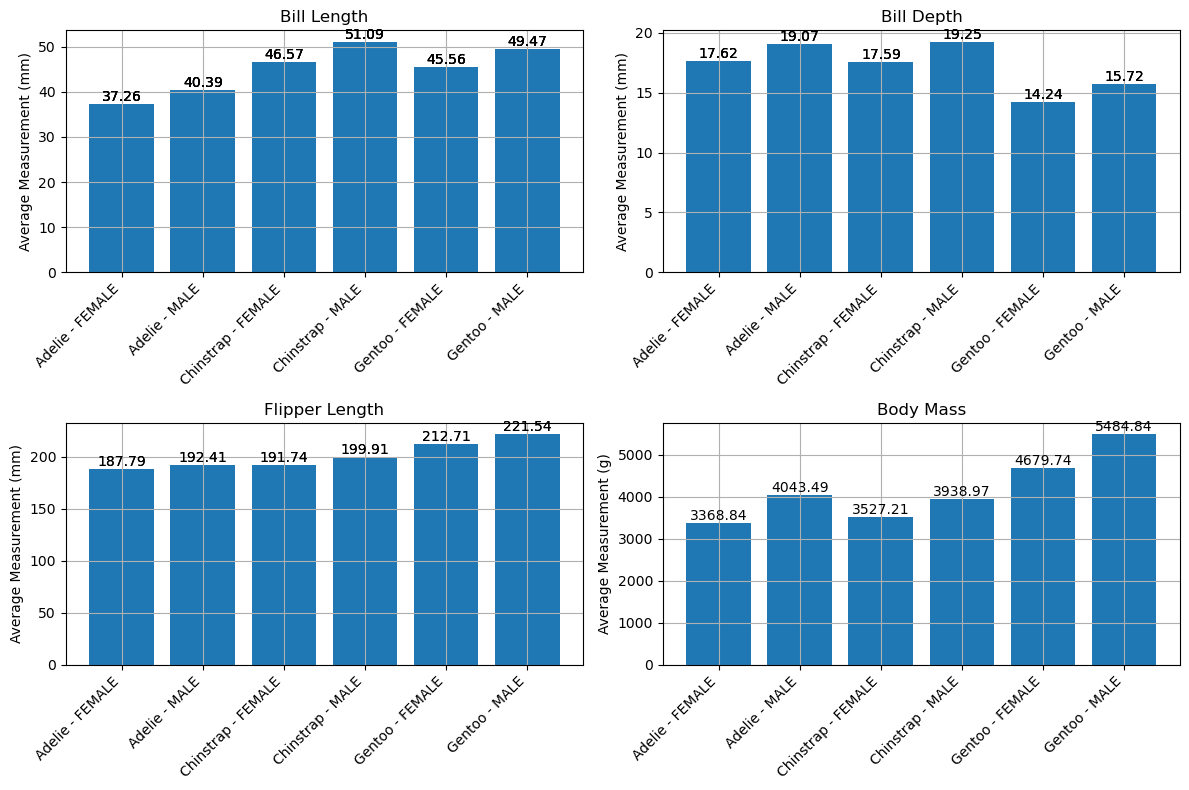

In [11]:
# We want to first get rid of any of the unidentified sexed penguins
defineddf = df.dropna(subset= ['sex'])

# Average bill length per sex needs to be calculated
# Using groupby we group species and sex with  lengths in mm average
defineddf_billlengthaverage = defineddf.groupby(['species', 'sex'], )['bill_length_mm'].mean().reset_index()
defineddf_billdepthaverage = defineddf.groupby(['species', 'sex'], )['bill_depth_mm'].mean().reset_index()
defineddf_flipperlengthaverage = defineddf.groupby(['species', 'sex'], )['flipper_length_mm'].mean().reset_index()
defineddf_bodymassaverage = defineddf.groupby(['species', 'sex'], )['body_mass_g'].mean().reset_index()
print(defineddf.columns)
fig, axes = plt.subplots(2,2, figsize= (12,8))
# Creates the bar chart looking at the species and sex seperating them into male female and the different species and prints their average lengths
for ax, df, title in zip(axes.ravel(), [defineddf_billlengthaverage, defineddf_billdepthaverage, defineddf_flipperlengthaverage, defineddf_bodymassaverage], ['Bill Length', 'Bill Depth', 'Flipper Length', 'Body Mass']):
    bars= ax.bar([f'{species} - {sex}' for species, sex in zip(df['species'], df['sex'])], df.iloc[:, 2])
    ax.set_xticklabels([f'{species} - {sex}' for species, sex in zip(df['species'], df['sex'])], rotation=45, ha='right')
    ax.set_title(title)
    ax.grid(True)
    if title == 'Body Mass':
        ax.set_ylabel('Average Measurement (g)')
    else:
        ax.set_ylabel('Average Measurement (mm)')
    for ax in axes.flat:
        for bar in ax.patches:
            height = bar.get_height()
            
            ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

plt.tight_layout()



plt.show()


In [12]:


# Calculate differences and percentage differences for each species
differences_list = []

# Iterate over each species
for species in defineddf['species'].unique():
    # Filter data for the current species and separate males and females
    species_data = defineddf[defineddf['species'] == species]
    males = species_data[species_data['sex'] == 'MALE']
    females = species_data[species_data['sex'] == 'FEMALE']
    
    # Calculate the differences and percentage differences for each measurement
    for measurement in ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']:
        male_mean = males[measurement].mean()
        female_mean = females[measurement].mean()
        difference = round(abs(female_mean - male_mean),2)  # Take absolute value
        percentage_difference = round(abs(((female_mean - male_mean) / male_mean) * 100),2)  # Take absolute value
        
        # Append the differences to the list
        differences_list.append({
            'Species': species,
            'Measurement': measurement.replace('_', ' ').title(),
            'Difference': difference,
            'Percentage Difference (%)': percentage_difference
        })

# Create a DataFrame from the differences list
differences_df = pd.DataFrame(differences_list)

# Display the table
print(differences_df)

      Species        Measurement  Difference  Percentage Difference (%)
0      Adelie     Bill Length Mm        3.13                       7.76
1      Adelie      Bill Depth Mm        1.45                       7.61
2      Adelie  Flipper Length Mm        4.62                       2.40
3      Adelie        Body Mass G      674.66                      16.69
4   Chinstrap     Bill Length Mm        4.52                       8.85
5   Chinstrap      Bill Depth Mm        1.66                       8.65
6   Chinstrap  Flipper Length Mm        8.18                       4.09
7   Chinstrap        Body Mass G      411.76                      10.45
8      Gentoo     Bill Length Mm        3.91                       7.90
9      Gentoo      Bill Depth Mm        1.48                       9.42
10     Gentoo  Flipper Length Mm        8.83                       3.99
11     Gentoo        Body Mass G      805.09                      14.68


The above data tells us that across all species of penguins that males are larger then their same species females. One can see that the largest percentage difference is between the body mass of male and female Adelie penguins at 16.69 %. Also the smallest difference is flipper length between Adelie penguins at 2.4 percent.

# Histogram
***
We are going to look at the distribution of the variables for the across the different sexes of each penguin species. However, we are going to pick only 3 variables as opposed to 4 in the barchart. In the bar chart we can see that flipper length varies the least between male and female penguins of all species the most of any variable therefore we will omit it and focus more on bill length, bill depth and body mass. 

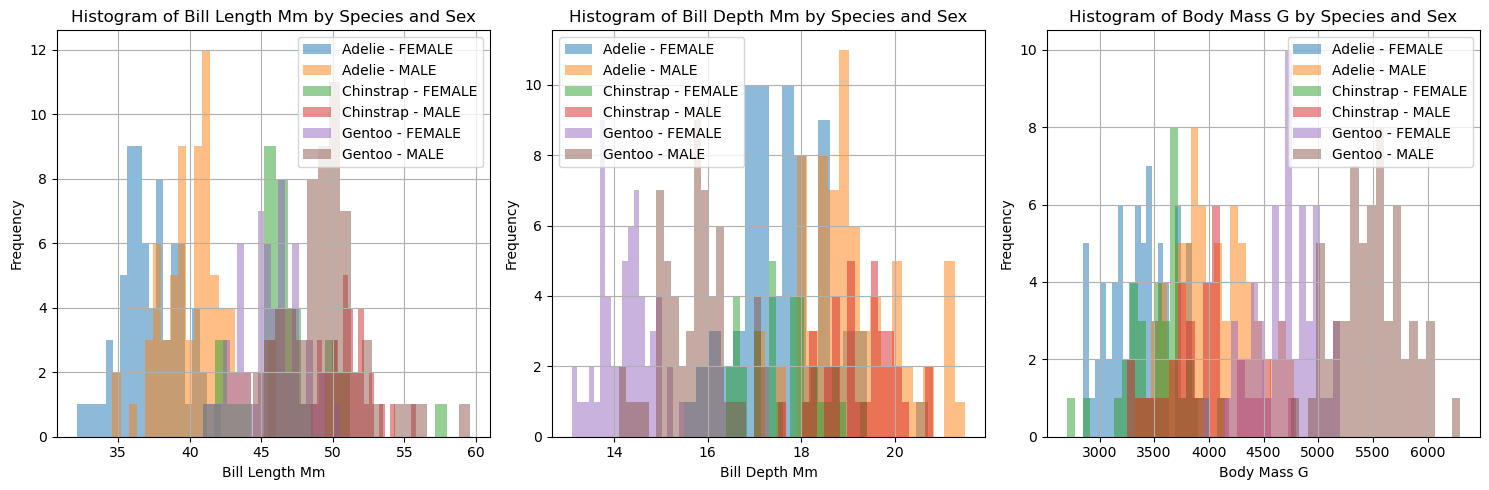

In [25]:
# Create subplots for each of the variables. 1 Row with 3 Columns.
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# The lis of the variables from the data set we want the histograms for.
variables = ['bill_length_mm', 'bill_depth_mm', 'body_mass_g']

# Loops over each variable in the list and loops over also the index for each item.
for i, variable in enumerate(variables):
    # Group the data frame by species and sex based on out variable. Then apply them to lists of their own.
    grouped_data = defineddf.groupby(['species', 'sex'])[variable].apply(list)
    
    # Iterate over each species and sex in our grouped data.
    for (species, sex), data in grouped_data.items():
    # This created the histogram to the subplot at index i.
        axes[i].hist(data, bins=20, alpha=0.5, label=f'{species} - {sex}')
    # Thel labelling
    axes[i].set_title(f'Histogram of {variable.replace("_", " ").title()} by Species and Sex')
    axes[i].set_xlabel(variable.replace("_", " ").title())
    axes[i].set_ylabel('Frequency')
    axes[i].legend()
    axes[i].grid(True)

plt.tight_layout()
plt.show()



## Histogram comments:
Based on evaulation of the 3 variables across the species we can start to compile some more trends we observe between the different species and the sexes within those species. For example Adelie's have the shortes bill length with females tending to have short bills thne males. Whereas Gentoo thend to have longer bills but shorter bill depths . Chin strpas tend to be in the middle of each species regrding their bills. Looking at body mass there seems to be a commanality that all the females are significantly lighter then their male counterparts. In some cases one could mistkae for example an Adelie male with a Gentoo female if you were just looking at their body mass. 

## References for above:
Sure, here are the links in markdown format:

1. **Matplotlib Documentation**:
   - Documentation: [Matplotlib](https://matplotlib.org/stable/contents.html)
   - Description: Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python.

2. **Pandas Documentation**:
   - Documentation: [Pandas](https://pandas.pydata.org/pandas-docs/stable/index.html)
   - Description: Pandas is a powerful library for data manipulation and analysis in Python, providing high-level data structures and functions to make working with structured data easy and intuitive.

3. **Enumerate Function**:
   - Documentation: [enumerate()](https://docs.python.org/3/library/functions.html#enumerate)
   - Description: The `enumerate()` function is used to loop over an iterable, providing both the index and the value of each item during iteration, which is useful for keeping track of the index while iterating.

4. **GroupBy in Pandas**:
   - Documentation: [Group By: split-apply-combine](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html)
   - Description: The `groupby()` function in Pandas is used to split the DataFrame into groups based on some criteria, typically followed by an aggregation or transformation operation.

5. **Histograms in Matplotlib**:
   - Documentation: [Histograms](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html)
   - Description: Matplotlib provides functions for creating histograms, which are graphical representations of the distribution of numerical data, showing the frequency of data points falling within specified ranges.

6. **Subplots in Matplotlib**:
   - Documentation: [Subplots](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html)
   - Description: Subplots allow you to create multiple plots within the same figure, organizing them in a grid-like structure, making it easy to compare different datasets or variables visually.

# Seaborn
***


Need to pick 2 variables to correlat also need to use some seaborn and also need to look back over the brief to ensure I haven't made this too complicated.


# this will be big

*you might have a paragaph pragraphs* have sentences.you might have a paragaph pragraphs have sentences.
you might have a paragaph pragraphs have sentences.
you might have a paragaph pragraphs have sentences.
you might have a paragaph pragraphs have sentences.
you might have a paragaph pragraphs have sentences.
you might have a paragaph pragraphs have sentences.
you might have a paragaph pragraphs have sentences.
you might have a paragaph pragraphs have sentences.

if you want a second paragraph leave a blank line! if you want a second paragraph leave a blank line!
if you want a second paragraph leave a blank line!
if you want a second paragraph leave a blank line!
if you want a second paragraph leave a blank line!
if you want a second paragraph leave a blank line!
if you want a second paragraph leave a blank line!if you want a second paragraph leave a blank line!
if you want a second paragraph leave a blank line!
**if you want a second paragraph leave a blank line!**



## this will be slightly smaller 
- #Bullet
- Point 
- Lists 

### this will be slightly smaller again
1. numbereed bullets
1. just use numbers.
1. this can be all sorted 1. 
1. how complex

> The definition of stupidity...... 
#### this will be slightly smaller again again
##### this will be slightly smaller again again again
###### this will be slightly smaller again again again again

## Tables

***

|Species   | Bill Length (mm) |bODY mass (g) |          
|----------|-----------------:|-------------:|
|Adelie    |             38.8 |          3701|
|Chinstrap |             48.8 |          3733|
|Gentoo    |             47.5 |          5076|

```  bash
$ ptyhon.py 
```

## Math 
***
$ f(x) = x^2$



***
###
End 